In [1]:
import pandas as pd

### Data Aggregation


#### Import dataset

In [14]:
df = pd.read_csv("C:/Users/lenovo/Documents/college/BE book/DMV/customer_shopping_data.csv")

#### Explore data

In [15]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [16]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [18]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True, errors='coerce')


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB


#### Group the sales data by region and calculate the total sales amt for each region 

In [22]:
df_grp = df.groupby('shopping_mall')['price'].sum().reset_index()

In [23]:
df_grp

,shopping_mall,price
0,Cevahir AVM,3433671.84
1,Emaar Square Mall,3390408.31
2,Forum Istanbul,3336073.82
3,Istinye Park,6717077.54
4,Kanyon,13710755.24
5,Mall of Istanbul,13851737.62
6,Metrocity,10249980.07
7,Metropol AVM,6937992.99
8,Viaport Outlet,3414019.46
9,Zorlu Center,3509649.02


#### create bar plot to visualize the sales data distribution by region

<AxesSubplot: >

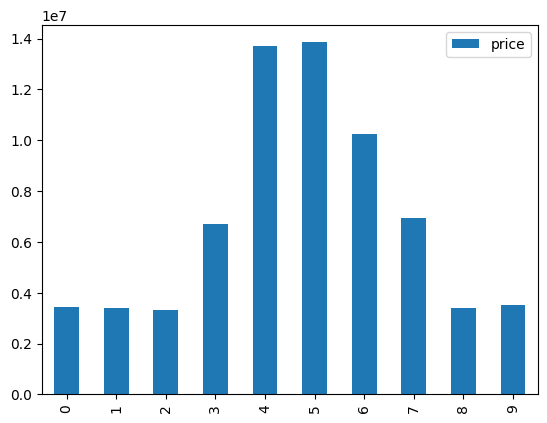

In [24]:
df_grp.plot(kind='bar')

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


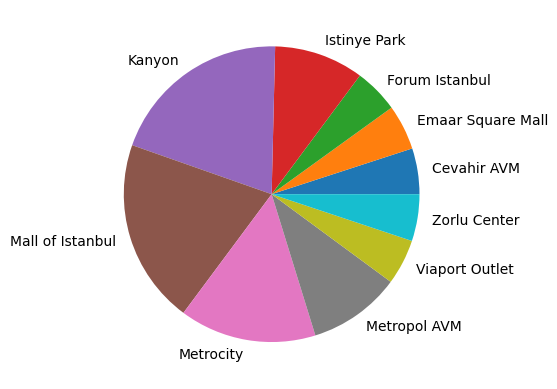

In [53]:
plt.pie(df_grp['price'],labels=df_grp['shopping_mall'])
plt.show()

#### Identify top performing regions based  on highest price

In [31]:
top_3_malls = df_grp.nlargest(3, 'price')

In [32]:
top_3_malls

,shopping_mall,price
5,Mall of Istanbul,13851737.62
4,Kanyon,13710755.24
6,Metrocity,10249980.07


In [35]:
df_grp.sort_values(by='price',ascending=False)

,shopping_mall,price
5,Mall of Istanbul,13851737.62
4,Kanyon,13710755.24
6,Metrocity,10249980.07
7,Metropol AVM,6937992.99
3,Istinye Park,6717077.54
9,Zorlu Center,3509649.02
0,Cevahir AVM,3433671.84
8,Viaport Outlet,3414019.46
1,Emaar Square Mall,3390408.31
2,Forum Istanbul,3336073.82


#### Grp the sales data by region and product category to calculate the total sales for each combination

In [39]:
df_grp_product = df.groupby(['category','shopping_mall'])['price'].sum()

In [62]:
df_grp_product = pd.DataFrame(df_grp_product)

#### Create a Stacked bar plots or grp bar plot to compare sale across diff region and product categories

<AxesSubplot: xlabel='shopping_mall'>

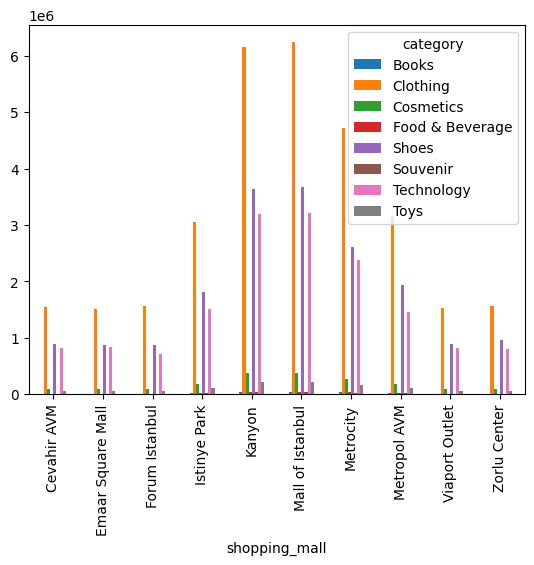

In [64]:
pivot_table = df_grp_product.pivot_table(values='price',columns='category',index='shopping_mall',aggfunc='sum')

pivot_table.plot(kind='bar')